In [1]:
import math
import matplotlib.pyplot as plt
import pandas as pd

# Question 1

In [2]:
# Question 1
# initializing variables
paperThickness = 1 # in mm
everestHeight = 8848000  # in mm
numOfFolds = 0

# goes through the loop until the paper's thickness is greater than mount everest's height
while paperThickness <= everestHeight:
    # everytime the paper is folded, its thickness doubles
    paperThickness = paperThickness * 2
    # increment the number of folds
    numOfFolds += 1

print(numOfFolds)

24


# Question 2

In [3]:
# Question 2
# initializing variables
time = 0
initialVolume = 1000
finalVolume = initialVolume

# goes through the loop until the final volume is less than the initial volume divoded by 2
while finalVolume >= initialVolume / 2:
    # using the formula that was given
    finalVolume = initialVolume * math.exp(-0.1*time)
    # incrementing the time
    time = time + 0.001
    
print(time)

6.93300000000065


# Question 3

In [4]:
# Question 3
# initial deposit
deposit = 100

# function that returns the total maount of money after a given amount of year
def moneyAfterYears(years):
    # the annual interest rate of 5%    
    interest = 0.05
    # initial money     
    money = deposit 
    
    for x in range(years):
        # adding the annual interest to the previous amount of money         
        money = money + money * interest
    
    # returning the rounded value         
    return round(money)

# displaying the results
print('After 1 year, I have: ' + str(moneyAfterYears(1)))
print('After 2 years, I have: ' + str(moneyAfterYears(2)))
print('After 3 years, I have: ' + str(moneyAfterYears(3)))
print('After 4 years, I have: ' + str(moneyAfterYears(4)))
print('After 5 years, I have: ' + str(moneyAfterYears(5)))

After 1 year, I have: 105
After 2 years, I have: 110
After 3 years, I have: 116
After 4 years, I have: 122
After 5 years, I have: 128


# Question 4

In [5]:
# Question 4
# initializing variables
carPayment = 20000
monthlyInterest = 0.01

def loanCalculator(months):
    
    # used the loan calculator formula that was given during recitation     
    monthlyPayment = (carPayment * monthlyInterest) / (1 - (1 + monthlyInterest) ** -months)
    
    # round and return the monthly payment 
    return round(monthlyPayment)

# print the results
print('Monthly payment for 1 year: ' + str(loanCalculator(1*12)))
print('Monthly payment for 2 years: ' + str(loanCalculator(2*12)))
print('Monthly payment for 3 years: ' + str(loanCalculator(3*12)))

Monthly payment for 1 year: 1777
Monthly payment for 2 years: 941
Monthly payment for 3 years: 664


# Question 5

Days to breakeven: 74


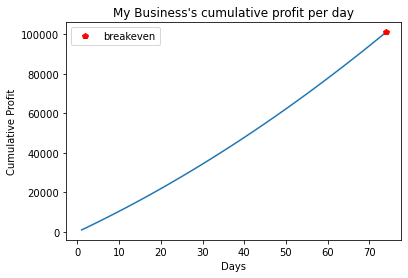

In [6]:
# Question 5
# initialize variables
investment = 100000
days = []
cumulativeProfit = []

# a function that returns the amount of days required to breakeven
def daysForBreakeven():
    # initial values     
    profit = 0
    customerNo = 100
    daysNo = 0

    # goes until the profit is greater or equal to the investment
    while profit < investment:
        # increment the number of days         
        daysNo = daysNo + 1
        # each customer brings 10 dollars of profit, add that to the previous profit         
        profit = profit + customerNo * 10
        # append the days and profit values to the arrays        
        days.append(daysNo)
        cumulativeProfit.append(profit)
        
        # increase the number of customers by 1 % but round it down because a customer is a person and it can't be point something        
        customerNo = int(customerNo + customerNo * 0.01)
    
    return daysNo

# a function that draws the graph of days vs cumulative profit
def showgraph():
    
    # plotting the points 
    plt.plot(days, cumulativeProfit)
    # plot the breakeven values as a red point     
    plt.plot(74, cumulativeProfit[days.index(74)], 'rp', label = 'breakeven')

    # naming the x axis
    plt.xlabel('Days')
    # naming the y axis
    plt.ylabel('Cumulative Profit')

    # giving a title to my graph
    plt.title('My Business\'s cumulative profit per day')
    
    # show the legend
    plt.legend()

    # function to show the plot
    plt.show()

print('Days to breakeven: ' + str(daysForBreakeven()))

showgraph()

# Question 6

Cases exceed 100 at: 2014-03-27 00:00:00
Cases exceed 500 at: 2014-06-13 00:00:00
Cases exceed 1000 at: 2014-07-15 00:00:00
Cases exceed 2000 at: 2014-08-12 00:00:00
Cases exceed 5000 at: 2014-09-12 00:00:00

Deaths exceed 100 at: 2014-04-06 00:00:00
Deaths exceed 500 at: 2014-07-05 00:00:00
Deaths exceed 1000 at: 2014-08-09 00:00:00
Deaths exceed 2000 at: 2014-09-03 00:00:00
Deaths exceed 5000 at: 2014-10-24 00:00:00


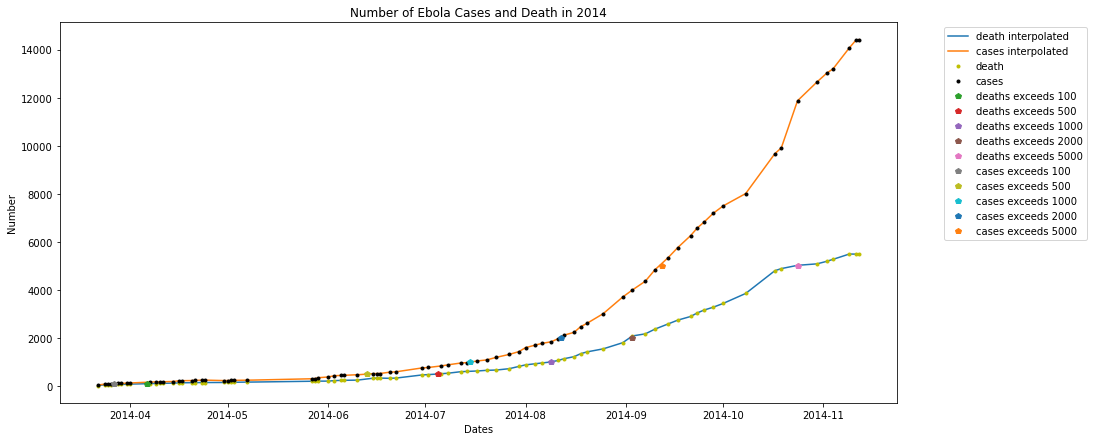

In [15]:
# Question 6


# read the excel file using pandas and receive a dataframe
dataframe = pd.read_excel('ebola_download.xls')
# making sure it sees the column as a datetime type instead of an object
dataframe['Date'] = pd.to_datetime(dataframe['Date']) 

# get a list of all days between the minimum and maximum dates
dates = pd.date_range(start = dataframe['Date'].min(), end =dataframe['Date'].max())
# copy the old dataframe
newDataframe = dataframe.copy()
# adding the dates that are missing, so that we have values for everyday
newDataframe = newDataframe.set_index('Date').reindex(dates.normalize().rename('Date')).reset_index()
# interpolate each column
newDataframe['Cases'] = newDataframe['Cases'].interpolate()
newDataframe['Death'] = newDataframe['Death'].interpolate()
newDataframe['Diff'] = newDataframe['Diff'].interpolate()
newDataframe['Noofdays'] = newDataframe['Noofdays'].interpolate()

# get the first date where cases exceed 100, 500, 1000, 2000, 5000
caseOver100 = newDataframe['Date'][newDataframe['Cases'] > 100].iloc[0]
caseOver500 = newDataframe['Date'][newDataframe['Cases'] > 500].iloc[0]
caseOver1000 = newDataframe['Date'][newDataframe['Cases'] > 1000].iloc[0]
caseOver2000 = newDataframe['Date'][newDataframe['Cases'] > 2000].iloc[0]
caseOver5000 = newDataframe['Date'][newDataframe['Cases'] > 5000].iloc[0]

# get the first date where deaths exceed 100, 500, 1000, 2000, 5000
deathOver100 = newDataframe['Date'][newDataframe['Death'] > 100].iloc[0]
deathOver500 = newDataframe['Date'][newDataframe['Death'] > 500].iloc[0]
deathOver1000 = newDataframe['Date'][newDataframe['Death'] > 1000].iloc[0]
deathOver2000 = newDataframe['Date'][newDataframe['Death'] > 2000].iloc[0]
deathOver5000 = newDataframe['Date'][newDataframe['Death'] > 5000].iloc[0]


# display results
print('Cases exceed 100 at: ' + str(caseOver100))
print('Cases exceed 500 at: ' + str(caseOver500))
print('Cases exceed 1000 at: ' + str(caseOver1000))
print('Cases exceed 2000 at: ' + str(caseOver2000))
print('Cases exceed 5000 at: ' + str(caseOver5000))

print()
# display results
print('Deaths exceed 100 at: ' + str(deathOver100))
print('Deaths exceed 500 at: ' + str(deathOver500))
print('Deaths exceed 1000 at: ' + str(deathOver1000))
print('Deaths exceed 2000 at: ' + str(deathOver2000))
print('Deaths exceed 5000 at: ' + str(deathOver5000))

# making the graph bigger for better visibility
plt.figure(figsize=(15, 7))

# Plotting the normal and interpolated points 
plt.plot(newDataframe['Date'], newDataframe['Death'],'-', label='death interpolated')
plt.plot(newDataframe['Date'], newDataframe['Cases'], '-', label='cases interpolated')
plt.plot(dataframe['Date'], dataframe['Death'],'.', color='y', label='death')
plt.plot(dataframe['Date'], dataframe['Cases'], '.', color='k', label='cases')


# mark the special values with a point and label them for the legend
plt.plot(deathOver100, 100, 'p', label="deaths exceeds 100")
plt.plot(deathOver500, 500, 'p', label="deaths exceeds 500")
plt.plot(deathOver1000, 1000, 'p', label="deaths exceeds 1000")
plt.plot(deathOver2000, 2000, 'p', label="deaths exceeds 2000")
plt.plot(deathOver5000, 5000, 'p', label="deaths exceeds 5000")

plt.plot(caseOver100, 100, 'p', label="cases exceeds 100")
plt.plot(caseOver500, 500, 'p', label="cases exceeds 500")
plt.plot(caseOver1000, 1000, 'p', label="cases exceeds 1000")
plt.plot(caseOver2000, 2000, 'p', label="cases exceeds 2000")
plt.plot(caseOver5000, 5000, 'p', label="cases exceeds 5000")

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Dates")
plt.ylabel("Number")
plt.title("Number of Ebola Cases and Death in 2014")
  
# Adding legend, which helps us recognize the curve according to it's color
# displaying the legend outside the graph for better visibility
plt.legend(bbox_to_anchor=(1.05, 1))

  
# show the graph
plt.show()

# Question 7

In [8]:
# calculate the growth rate for death and cases columns and store it in new columns
newDataframe['growth_rate_cases'] = newDataframe['Cases'].pct_change().mul(100)
newDataframe['growth_rate_death'] = newDataframe['Death'].pct_change().mul(100)

# calculate the average growth rate from the new column
print('Average growth rate for cases in %: ' + str(newDataframe['growth_rate_cases'].mean()))
print('Average growth rate for death in %: ' + str(newDataframe['growth_rate_death'].mean()))

Average growth rate for cases in %: 2.5065218916499954
Average growth rate for death in %: 2.330608083367969


# Question 8

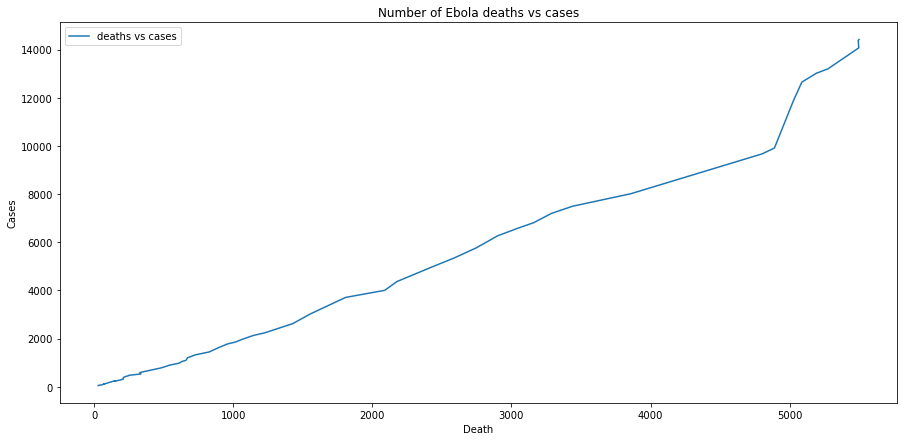

Average death to cases ratio is: 0.5577992908998354


In [14]:
# Question 8
# calculating the ratio for all values and storing it in a variable
newDataframe["Death to cases Ratio"] = newDataframe['Death'] / newDataframe['Cases']

# getting the ratio
aveargeRatio = newDataframe["Death to cases Ratio"].mean()

# making the graph bigger for better visibility
plt.figure(figsize=(15,7))

# plot deaths vs cases
plt.plot(newDataframe['Death'], newDataframe['Cases'],'-',  label='deaths vs cases')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Death")
plt.ylabel("Cases")
plt.title("Number of Ebola deaths vs cases")

# add a legend
plt.legend()

# show the graph and display average ratio
plt.show()
print('Average death to cases ratio is: ' + str(aveargeRatio))

# Question 9

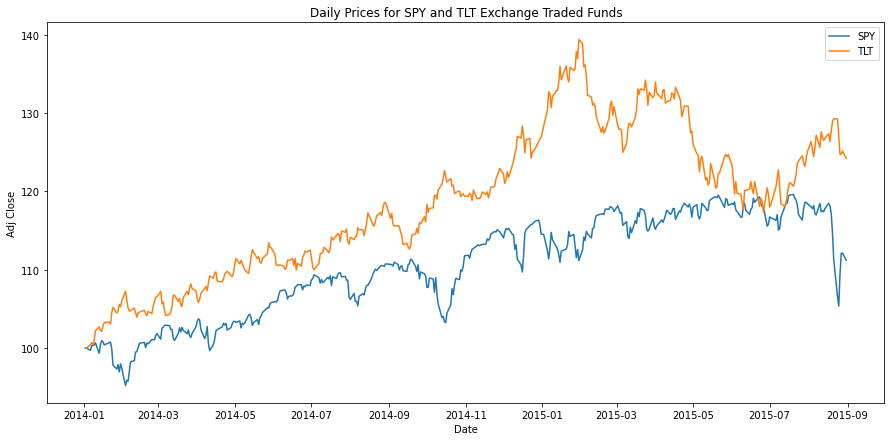

In [12]:
# Question 9

# read csv files and make sure the 'Date' column is seen as a date not object
dataframeSPY = pd.read_csv('SPY.csv')
dataframeSPY['Date'] = pd.to_datetime(dataframeSPY['Date'])

dataframeTLT = pd.read_csv('TLT.csv')
dataframeTLT['Date'] = pd.to_datetime(dataframeTLT['Date'])

# define the start and end time
startDate = pd.to_datetime('2014-01-01', format='%Y-%m-%d')
endDate = pd.to_datetime('2015-08-31', format='%Y-%m-%d')

# get dates that are only between the start and end time
condition = dataframeSPY['Date'].between(startDate, endDate, inclusive = 'both')

# divide every value by the first value and multiply it by 100, because we want both values to start with 100
normalizedAdjSPY = dataframeSPY['Adj Close'][condition] / dataframeSPY['Adj Close'][condition].iloc[0] * 100
normalizedAdjTLT = dataframeTLT['Adj Close'][condition] / dataframeTLT['Adj Close'][condition].iloc[0] * 100

# making the graph bigger for better visibility
plt.figure(figsize=(15,7))

# plot both curves
plt.plot(dataframeSPY['Date'][condition], normalizedAdjSPY, label='SPY')
plt.plot(dataframeTLT['Date'][condition], normalizedAdjTLT, label='TLT')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Date")
plt.ylabel("Adj Close")
plt.title("Daily Prices for SPY and TLT Exchange Traded Funds")

# add a legend
plt.legend()
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()



# show the graph
plt.show()

# Question 10

In [11]:
# Question 10
# calculate daily returns and store in new columns
SPYDailyReturns = dataframeSPY['Adj Close'][condition].pct_change().mul(100)
TLTDailyReturns = dataframeTLT['Adj Close'][condition].pct_change().mul(100)

# calculate and print the average, min and max 
print('SPY average daily return in %: ' + str(SPYDailyReturns.mean()))
print('SPY min daily return in %: ' + str(SPYDailyReturns.min()))
print('SPY max daily return in %: ' + str(SPYDailyReturns.max()))

print()
print('TLT average daily return in %: ' + str(TLTDailyReturns.mean()))
print('TLT min daily return in %: ' + str(TLTDailyReturns.min()))
print('TLT max daily return in %: ' + str(TLTDailyReturns.max()))


SPY average daily return in %: 0.028612224182557648
SPY min daily return in %: -4.210697162689259
SPY max daily return in %: 3.8394124544050445

TLT average daily return in %: 0.05537842887416558
TLT min daily return in %: -2.4324931167024166
TLT max daily return in %: 2.6468904269034477
